<a href="https://colab.research.google.com/github/yulandariarsyad/Pusat-Studi-Data-Sains-UAD/blob/main/Tugas_Model_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 12 Model Machine Learning 

## Impor Library

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## Membuka Data

In [43]:
df=pd.read_csv('https://raw.githubusercontent.com/yulandariarsyad/Pusat-Studi-Data-Sains-UAD/main/weatherAUS.csv%20-%20weatherAUS.csv.csv')
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006,7.0,8.0,17.8,29.7,No,No


Dataset ini berisi 23 atribut. Secara khusus, Dataset adalah salah satu yang telah digunakan oleh peneliti ML untuk
tanggal ini. Bidang "tujuan" mengacu pada adanya hujan atau tidak.

Feature dalam dataset sebagai berikut :


1.   **Date**          = Tanggal pengambilan data
2.   **Location**      = Lokasi
3.   **MinTemp**       = Temperatur Minimal
4.   **MaxTemp**       = Temperatur Maksimal 
5.   **Rainfall**      = Curah Hujan
6.   **Evaporation**   = indeks penguapan
7.   **Sunshine**      = indeks sinar matahari
8.   **WindGustDir**   = durasi hembusan angin
9.   **WindGustSpeed** = Kecepatan Angin
10.  **WindDir9am**    = Durasi hembusan angin pada jam 9 pagi
11.  **WindDir3pm**    = Durasi hembusan angin pada jam 3 sore
12.  **WindSpeed9am**  = Kecepatan angin pada jam 9 pagi
13.  **WindSpeed3pm**  = Kecepatan angin pada jam 3 sore
14.   **Humidity9am**  = Kelembaban pada jam 9 pagi
15.   **Humidity3pm**  = Kelembaban pada jam 3 sore
16.   **Pressure9am**  = Tekanan udara jam 9 pagi
17.   **Pressure3pm**  = Tekanan udara jam 3 pagi
18.  **Cloud9am**      = Awan jam 9 pagi
19.  **Cloud3pm**      = Awan jam 3 sore
20.  **Temp9am**       = Temperatur jam 9 pagi
21.  **Temp3pm**       = Temperatur jam 3 sore
22.  **RainToday**     = Hari ini hujan atau tidak
23.  **RainTomorrow**  = Besok hujan atau tidak



# Encoding Data

In [44]:
df['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
df['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

In [45]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0,0.0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0,0.0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0,0.0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0,0.0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006,7.0,8.0,17.8,29.7,0.0,0.0


## EDA & Data Prepeocessing

In [46]:
df.RainTomorrow.value_counts()

0.0    110316
1.0     31877
Name: RainTomorrow, dtype: int64

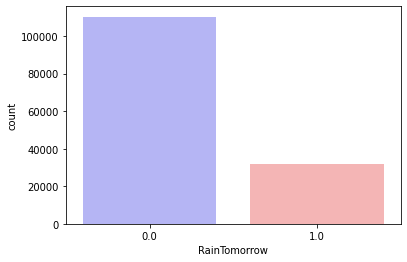

In [47]:
sns.countplot(x="RainTomorrow", data=df, palette="bwr")
plt.show()

In [48]:
countNoDisease = len(df[df.RainTomorrow == 0])
countHaveDisease = len(df[df.RainTomorrow == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(df.RainTomorrow))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(df.RainTomorrow))*100)))

Percentage of Patients Haven't Heart Disease: 75.84%
Percentage of Patients Have Heart Disease: 21.91%


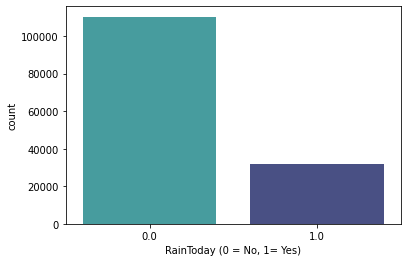

In [49]:
sns.countplot(x='RainToday', data=df, palette="mako_r")
plt.xlabel("RainToday (0 = No, 1= Yes)")
plt.show()

In [50]:
countFemale = len(df[df.RainToday == 0])
countMale = len(df[df.RainToday == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(df.RainToday))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(df.RainToday))*100)))

Percentage of Female Patients: 75.84%
Percentage of Male Patients: 21.92%


In [51]:
df.groupby('RainTomorrow').mean()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
RainTomorrow,,,,,,,,,,,,,,,,
0.0,11.897675,23.836247,1.270290,5.734807,8.546358,38.288391,13.567314,18.222804,66.217573,46.510625,1018.595599,3.932282,3.921896,17.077001,22.402905,0.153834
1.0,13.186890,21.119100,6.142104,4.527779,4.471761,45.946764,15.508577,20.078509,77.983314,68.800019,1014.400000,6.099990,6.360065,16.676598,19.197113,0.467838


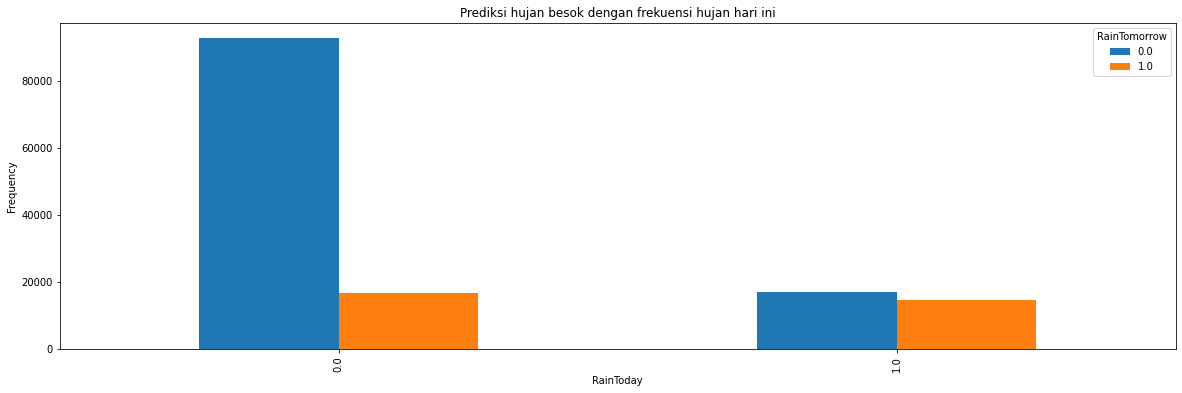

In [52]:
pd.crosstab(df.RainToday,df.RainTomorrow).plot(kind="bar",figsize=(20,6))
plt.title('Prediksi hujan besok dengan frekuensi hujan hari ini')
plt.xlabel('RainToday')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

In [53]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0,0.0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0,0.0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0,0.0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0,0.0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006,7.0,8.0,17.8,29.7,0.0,0.0


In [54]:
df['WindGustDir'].unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', nan, 'ENE',
       'SSE', 'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

In [55]:
df = df.drop(['Sunshine','Evaporation','Cloud3pm','Cloud9am','Date', 'Location'], axis=1)
cat_variable = ['WindGustDir','WindDir9am','WindDir3pm']
df.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0.0,0.0
1,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0.0,0.0
2,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0.0,0.0
3,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0.0,0.0
4,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006,17.8,29.7,0.0,0.0


In [56]:
df = pd.get_dummies(df,columns=cat_variable,drop_first=True)

In [57]:
df.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006,17.8,29.7,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [58]:
df.shape

(145460, 59)

In [59]:
df.dropna(inplace=True)
df.shape

(119590, 59)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119590 entries, 0 to 145458
Data columns (total 59 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   MinTemp          119590 non-null  float64
 1   MaxTemp          119590 non-null  float64
 2   Rainfall         119590 non-null  float64
 3   WindGustSpeed    119590 non-null  float64
 4   WindSpeed9am     119590 non-null  float64
 5   WindSpeed3pm     119590 non-null  float64
 6   Humidity9am      119590 non-null  float64
 7   Humidity3pm      119590 non-null  float64
 8   Pressure9am      119590 non-null  float64
 9   Pressure3pm      119590 non-null  object 
 10  Temp9am          119590 non-null  float64
 11  Temp3pm          119590 non-null  float64
 12  RainToday        119590 non-null  float64
 13  RainTomorrow     119590 non-null  float64
 14  WindGustDir_ENE  119590 non-null  uint8  
 15  WindGustDir_ESE  119590 non-null  uint8  
 16  WindGustDir_N    119590 non-null  uint

In [61]:
y = df.RainTomorrow.values
x_data = df.drop(['RainTomorrow'], axis = 1)

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x_data,y,test_size = 0.21,random_state=0)

In [63]:
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

## Machine Learning Modeling

**[1] Logistic Regression**

In [21]:
accuracies = {}

lr = LogisticRegression()
lr .fit(x_train.T,y_train.T)
acc = lr.score(x_test.T,y_test.T)*100

accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 84.73%


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


**[2] KNN Algorithm**

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(x_train.T, y_train.T)
prediction = knn.predict(x_test.T)

print("{} NN Score: {:.2f}%".format(2, knn.score(x_test.T, y_test.T)*100))

2 NN Score: 82.79%


In [43]:
#Gk bisa
# try ro find best k value
scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(x_train.T, y_train.T)
    scoreList.append(knn2.score(x_test.T, y_test.T))
    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList)*100
accuracies['KNN'] = acc
print("Maximum KNN Score is {:.2f}%".format(acc))

KeyboardInterrupt: ignored

**[3] Support Vector Machine (SVM) Algorithm**

In [ ]:
#Gk Bisa
svm = SVC(random_state = 1)
svm.fit(x_train.T, y_train.T)

acc = svm.score(x_test.T,y_test.T)*100
accuracies['SVM'] = acc
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))

**[4] Naive Bayes Algorithm**

In [64]:
nb = GaussianNB()
nb.fit(x_train.T, y_train.T)

acc = nb.score(x_test.T,y_test.T)*100
accuracies['Naive Bayes'] = acc
print("Accuracy of Naive Bayes: {:.2f}%".format(acc))

Accuracy of Naive Bayes: 73.33%


**[5] Decision Tree Algorithm**

In [65]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train.T, y_train.T)

acc = dtc.score(x_test.T, y_test.T)*100
accuracies['Decision Tree'] = acc
print("Decision Tree Test Accuracy {:.2f}%".format(acc))

Decision Tree Test Accuracy 79.10%


**[6] Random Forest Classification**

In [66]:
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(x_train.T, y_train.T)

acc = rf.score(x_test.T,y_test.T)*100
accuracies['Random Forest'] = acc
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

KeyboardInterrupt: ignored

**[7] Linear Discriminant Analysis**

In [67]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(x_train.T, y_train.T)
acc = lda.score(x_test.T,y_test.T)*100

accuracies['LDA'] = acc
print("LDA Accuracy Score : {:.2f}%".format(acc))

LDA Accuracy Score : 84.69%


**[8] AdaBoost Algorithm**

In [68]:
from sklearn.ensemble import AdaBoostClassifier
AB = AdaBoostClassifier()
AB.fit(x_train.T, y_train.T)
acc = AB.score(x_test.T,y_test.T)*100

accuracies['AB'] = acc
print("AdaBoost Accuracy Score : {:.2f}%".format(acc))

AdaBoost Accuracy Score : 84.75%


**[9] Perceptron Algorithm**

In [ ]:
from sklearn.linear_model import Perceptron
Perc = Perceptron()
Perc.fit(x_train.T, y_train.T)
acc=Perc.score(x_test.T,y_test.T)*100

accuracies['Perceptron'] = acc
print("Perceptron Accuracy Score : {:.2f}%".format(acc))

Perceptron Accuracy Score : 82.81%


**[10] Multi-layer Perceptron (MLP)**

In [69]:
from sklearn.neural_network import MLPClassifier
MLPC = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)
MLPC.fit(x_train.T, y_train.T)

acc = MLPC.score(x_test.T,y_test.T)*100

accuracies['MLPC'] = acc
print("MLP Accuracy Score : {:.2f}%".format(acc))

MLP Accuracy Score : 78.34%
